In [1]:
#Packages
%pylab
%matplotlib inline
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from nuclei_segmentation import otsu as ot

Using matplotlib backend: <object object at 0x0000021C0B21A470>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
# otsu_i function
#works on gt images, for some reason thresholding of everything else gives me only 'b' ://
def otsu_i(image):
    img=ot.otsu_thresholding(image, 256)
    i = img.shape[0]
    j = img.shape[1]
    it = [[[] * 1] * j] * i
    for x, y in np.ndindex((i-1,j-1)):
            if img[x,y] != 0:
                it[x][y]='f'
            else:
                it[x][y]='b'
    return it


In [2]:
img_1 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif") 

# crop function, can be useful outside the sliding window, returns an array equivalent to a rectangular "cut-out" of the picture :)
def crop(image, xmin, ymin, xmax, ymax):
    cropped=np.empty([xmax-xmin, ymax-ymin], dtype=float)
    for a,b in np.ndindex(xmax-xmin, ymax-ymin):
        cropped[a,b]=image[a+xmin,b+ymin]
    return cropped

    

In [12]:
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)
crop(img_1, 0,0,600,600)



array([[ 0.,  3.,  3., ...,  3.,  0.,  0.],
       [ 0.,  0.,  3., ..., 13.,  3.,  3.],
       [ 0.,  0.,  3., ...,  0.,  3.,  3.],
       ...,
       [ 0.,  3.,  6., ...,  3.,  0.,  0.],
       [ 0.,  3.,  0., ...,  3.,  6.,  3.],
       [ 0.,  0.,  0., ...,  3.,  3.,  0.]])

In [ ]:
img_1 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif") 
img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 
gt10 = plt.imread(r'data\Otsu_data\NIH3T3\gt\33.png')
otsu_i(gt10)

In [ ]:
#image cropping?????
#WORKS???
def crop(image,x,y,w,z):
    h = w-x
    w = z-y
    cropped = np.zeros([h,w])
    for a in range(x,w):
        for b in range(y,z):
            cropped[a-x,b-y]=image[a,b]
    return cropped
    


In [ ]:
cropped=np.zeros([3,4])
print(cropped)

In [ ]:

crop(gt10,50,50,100,100)


In [ ]:
# otsu thresholding
def otsu_t(img,x):
    import matplotlib.pyplot
    import numpy
#bins optimieren.... alles zu 0-255 machen


   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins, patches = matplotlib.pyplot.hist(img.flatten(),log = 'False',bins = x)

   # initialize threshold value (T = 0) 
    thres = 0
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    bcv = list()
    
    # set up initial values
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0

        #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
        for j in range(0,i+1):
            w0_sum += n[j]
            mean_sum0 += bins[j]*n[j]
            
        # background class probabilites and class mean levels
        w0 = w0_sum / sum(n)  
        if(sum(n[0:i+1]) != 0):  
             mean_0 = mean_sum0 / sum(n[0:i+1])
        else: mean_0 = 0
        
        # compute background class variance
        for m in range(0,i+1):
            v0_sum += ((bins[m]-mean_0)** 2) * n[m]
        
        v0 = v0_sum / sum(n[0:i+1])
        
        # sum up the probabilites of each intensity value;  and the mean value
        for k in range(i+1, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += bins[k]*n[k]

        # compute foreground class probabilities and class mean levels    
        w1 = w1_sum / sum(n)
     
        if(sum(n[i+1:len(n)]) != 0):
            mean_1 = mean_sum1 / sum(n[i+1:len(n)])
        else: mean_1 = 0
        # compute foreground class variance 
        for s in range(i+1,len(n)):
            v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
        if( sum(n[i+1:len(n)]) != 0):
            v1 = v1_sum / sum(n[i+1:len(n)])
        else: v1 = 0

        # compute within class variance and append to list
        bclv = (w0 * v0) + (w1 * v1)
        bcv.append(bclv)

    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(bcv)
    return optimal_thres

otsu_t(img_3, 256)

In [ ]:
a = np.zeros(shape=(3,3,1,1))
print(a)

np.insert(a,[0,0,0], [5])
print(a)

In [ ]:
array = [[[0]*1]*3]*3
print(array)
print(array[0][0][0])
add = [5,5,5]
array[0][0][0] = 5
print(array)

In [ ]:
arr = np.zeros((5,5,1))

arr[0,0] = arr[0,0]+5
print(arr)

In [5]:
def crop(image,x,y,w,z):
    h = w-x
    w = z-y
    cropped = np.zeros([h,w])
    for a in range(x,w):
        for b in range(y,z):
            cropped[a-x,b-y]=image[a,b]
    return cropped

def i_sw(image,stepsize,framesize):
    img=copy(image)
    intensity=np.max(img)
    array=np.zeros([img.shape[0],img.shape[1],1])
    x=0
    y=0
    while x+framesize<=img.shape[0]:
        while y+framesize<=img.shape[1]:
            window=crop(img,x,y,x+framesize, y+framesize)
            for a,b in ndindex(window.shape[0],window.shape[1]):
                c=a+x
                d=b+y
                array[c,d,0]=0
            y+=stepsize
        y=0
        x+=stepsize
    for i, j in np.ndindex(img.shape[0], img.shape[1]):
        img[i,j]= array[i,j,0]
    print(img)
    figure()
    imshow(img,'gray')
    return img

In [3]:
imgdna44 = imread (r"data\Otsu_data\NIH3T3\img\dna-44.png")
#i_sw(imgdna44,100,200)

[[[0.00141935 1.         0.        ]
  [0.00141935 1.         0.        ]
  [0.00141935 1.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00141935 1.         0.        ]
  [0.00141935 1.         0.        ]
  [0.00141935 1.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00141935 1.         0.        ]
  [0.00141935 1.         0.        ]
  [0.00141935 1.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


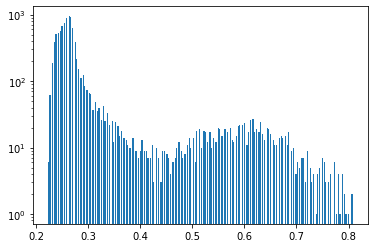

In [6]:
def otsu_t(img,x):
    import matplotlib.pyplot
    import numpy
#bins optimieren.... alles zu 0-255 machen


   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins, patches = matplotlib.pyplot.hist(img.flatten(),log = 'False',bins = x)

   # initialize threshold value (T = 0) 
    thres = 0
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    bcv = list()
    
    # set up initial values
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0

        #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
        for j in range(0,i+1):
            w0_sum += n[j]
            mean_sum0 += bins[j]*n[j]
            
        # background class probabilites and class mean levels
        w0 = w0_sum / sum(n)  
        if(sum(n[0:i+1]) != 0):  
             mean_0 = mean_sum0 / sum(n[0:i+1])
        else: mean_0 = 0
        
        # compute background class variance
        for m in range(0,i+1):
            v0_sum += ((bins[m]-mean_0)** 2) * n[m]
        
        v0 = v0_sum / sum(n[0:i+1])
        
        # sum up the probabilites of each intensity value;  and the mean value
        for k in range(i+1, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += bins[k]*n[k]

        # compute foreground class probabilities and class mean levels    
        w1 = w1_sum / sum(n)
     
        if(sum(n[i+1:len(n)]) != 0):
            mean_1 = mean_sum1 / sum(n[i+1:len(n)])
        else: mean_1 = 0
        # compute foreground class variance 
        for s in range(i+1,len(n)):
            v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
        if( sum(n[i+1:len(n)]) != 0):
            v1 = v1_sum / sum(n[i+1:len(n)])
        else: v1 = 0

        # compute within class variance and append to list
        bclv = (w0 * v0) + (w1 * v1)
        bcv.append(bclv)

    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(bcv)
    return optimal_thres

img=imgdna44
x=0
y=0
framesize=100
window=crop(img,x,y,x+framesize, y+framesize)
threshold = otsu_t(window,255)
array=np.zeros([img.shape[0],img.shape[1],3])
for a, b in np.ndindex(window.shape[0], window.shape[1]):
    c=a+x
    d=b+y
    array[c,d,0]+=threshold
    array[c,d,1]+=1
print(array)